In [21]:
# !pip install numpy matplotlib pillow scipy scikit-learn

In [22]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [23]:
def surface(x,y,type="spherical"):
    radius = 12
    if type == "spherical":
        z2 = radius**2 - x**2 - y**2
        z2[z2 < 0] = 0
        z = np.sqrt(z2)
        normal = np.array([x, y, z])
        norm= np.linalg.norm(normal)
        print(y)
        normal = normal/norm
        return normal, z

[[-32 -32 -32 ... -32 -32 -32]
 [-31 -31 -31 ... -31 -31 -31]
 [-30 -30 -30 ... -30 -30 -30]
 ...
 [ 29  29  29 ...  29  29  29]
 [ 30  30  30 ...  30  30  30]
 [ 31  31  31 ...  31  31  31]]


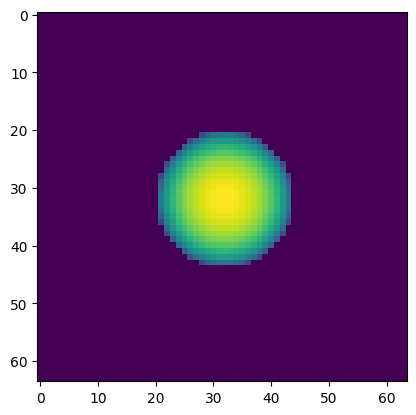

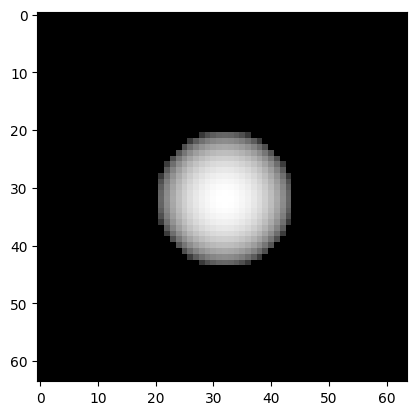

In [24]:
filename = 'bunny2.jpg'
useImage = False

lamb = 1

if useImage:
    E0 = Image.open(filename).convert('L')
    E0 = np.array(E0)
    plt.imshow(E0, cmap='gray')
    plt.show()

    lim1 = E0.shape[0]//2
    lim2 = E0.shape[1]//2
    x = np.arange(-lim2,lim2,1)
    y = np.arange(-lim1,lim1,1)
    X,Y = np.meshgrid(x,y)

else:
    x = np.arange(-32,32,1)
    y = np.arange(-32,32,1)
    X,Y = np.meshgrid(x,y)
    epsilon = 0
    s_hat = np.array([epsilon,epsilon,1])
    n_hat, z_original = surface(X,Y)
    E0 = s_hat[0]*n_hat[0]+ s_hat[1]*n_hat[1]+ s_hat[2]*n_hat[2]
    plt.imshow(E0)
    plt.show()
    dz_original_dx = np.gradient(z_original, axis=0)
    dz_original_dy = np.gradient(z_original, axis=1)
    np.save('p_original.npy', dz_original_dx)
    np.save('q_original.npy', dz_original_dy)

max_E0 = E0.max()
noise_factor = 0.1

E0 = E0 / max_E0

alpha = 1
noise = np.random.normal(0,noise_factor,E0.shape)
noise = 0
E = E0 ** alpha + noise

plt.imshow(E, cmap='gray')
plt.show()
v_hat = np.array([0,0,1])


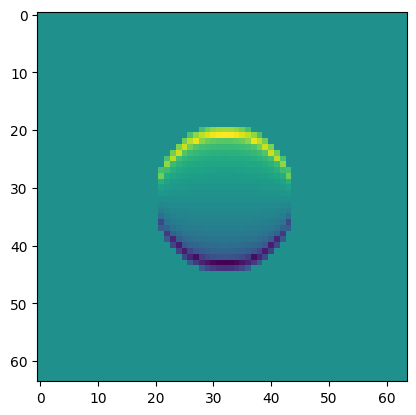

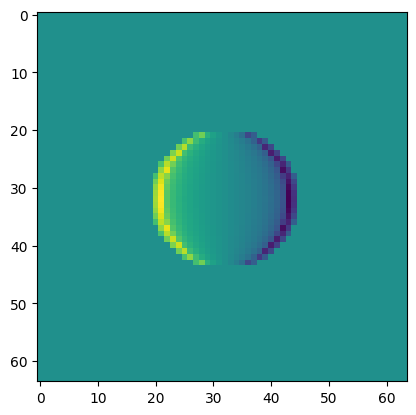

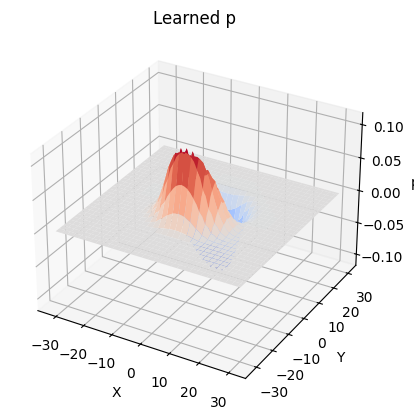

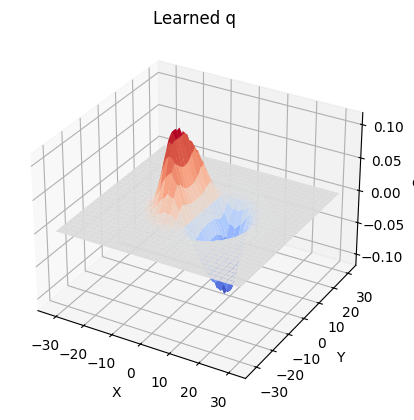

In [25]:
p = (np.gradient(E, axis=0))
q = (np.gradient(E, axis=1))
# Generate boundary of E
plt.show()
plt.imshow(p)
plt.show()
plt.imshow(q)
plt.show()
def generateR(p,q):
    return (-p*v_hat[0] -q*v_hat[1] +1*v_hat[2])/(p**2+q**2+1)
R = E
for i in range(10):
    dR_dp = np.gradient(R, axis=0)
    dR_dq = np.gradient(R, axis=1)
    p_bar = (np.roll(p, 1, axis=0) + np.roll(p, -1, axis=0) + np.roll(p, 1, axis=1) + np.roll(p, -1, axis=1)) / 4
    q_bar = (np.roll(q, 1, axis=0) + np.roll(q, -1, axis=0) + np.roll(q, 1, axis=1) + np.roll(q, -1, axis=1)) / 4
    p = p_bar - 1/lamb * (E - R) * dR_dp
    q = q_bar - 1/lamb * (E - R) * dR_dq
    R = generateR(p,q)
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, p, cmap='coolwarm')
ax.set_title('Learned p')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, q, cmap='coolwarm')
ax.set_title('Learned q')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('q')
plt.show()

np.save('p_learned.npy', p)
np.save('q_learned.npy', q)

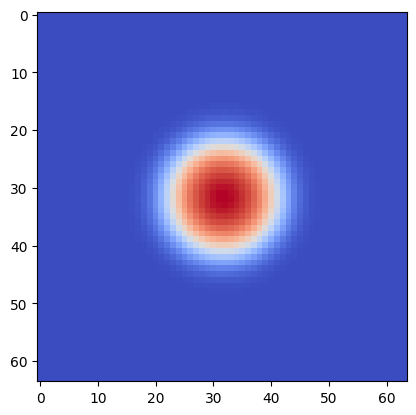

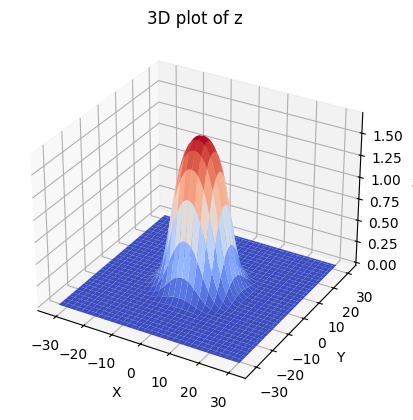

In [26]:
# from scipy.integrate import cumtrapz
nx = 64
ny = 64
x = np.arange(-32, 32, nx)
y = np.linspace(-32, 32, ny)

z_x = np.zeros_like(p)
for i in range(1, p.shape[0]):
    z_x[i, :] = z_x[i-1, :] + p[i, :] 

z_y = np.zeros_like(q)
for j in range(1, q.shape[1]):
    z_y[:, j] = z_y[:, j-1] + q[:, j] 
z = z_x + z_y

# Center the z values

plt.imshow(z, cmap='coolwarm')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, z, cmap='coolwarm')
ax.set_title('3D plot of z')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('z')
plt.show()